# **Dataset Analysis and EDA**

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import re
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# Load dataset
df = pd.read_csv('/kaggle/input/hate-speech-and-offensive-language-dataset/labeled_data.csv') 

In [17]:
print("=== Dataset Info ===")
print(df.info())

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          24783 non-null  int64  
 1   count               24783 non-null  int64  
 2   hate_speech         24783 non-null  int64  
 3   offensive_language  24783 non-null  int64  
 4   neither             24783 non-null  int64  
 5   class               24783 non-null  int64  
 6   tweet               24783 non-null  object 
 7   label               24783 non-null  object 
 8   tweet_length        24783 non-null  int64  
 9   hashtags            24783 non-null  object 
 10  sentiment           24783 non-null  float64
dtypes: float64(1), int64(7), object(3)
memory usage: 2.1+ MB
None


In [18]:
print("\n=== Null Value Counts ===")
print(df.isnull().sum())


=== Null Value Counts ===
Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
label                 0
tweet_length          0
hashtags              0
sentiment             0
dtype: int64


In [19]:
print("\n=== Class Distribution ===")
print(df['label'].value_counts())
print("\nClass Proportion (%):")
print(df['label'].value_counts(normalize=True) * 100)


=== Class Distribution ===
label
Offensive      19190
Neutral         4163
Hate Speech     1430
Name: count, dtype: int64

Class Proportion (%):
label
Offensive      77.432111
Neutral        16.797805
Hate Speech     5.770084
Name: proportion, dtype: float64


In [20]:
print("\n=== Average Tweet Length (in words) per Class ===")
print(df.groupby('label')['tweet_length'].mean())



=== Average Tweet Length (in words) per Class ===
label
Hate Speech    13.906993
Neutral        14.919289
Offensive      13.958624
Name: tweet_length, dtype: float64


In [21]:
print("\n=== Sample Tweets for Each Class ===")
for label in df['label'].unique():
    print(f"\n--- {label} ---")
    print(df[df['label'] == label]['tweet'].sample(3, random_state=42).to_list())



=== Sample Tweets for Each Class ===

--- Neutral ---
['RT @chicagotribune: Chicago will not refund $7.7 million made from red light tickets issued after yellow lights were shortened http://t.co/&#8230;', 'Sometimes, even I gotta tell these hoes to grow up smh', '&#8216;Chillin&#8217; With My Homie Or What&#8217;s Left Of Him&#8217;: British Rapper Turned ISIS Jihadi Poses With Severed Head http://t.co/L9vMdNOXPg #tcot']

--- Offensive ---
['Why is it everytime I go to cracker barrel the girl with great tits that seats you who is your waitress nope its the chick with 2 teeth', "Run that nigga, you don't want that nigga, but I need a bad bitch that's hotter than me", "I need a girl from Jamaica I can't fuck with these basic black bitches"]

--- Hate Speech ---
['@AustinG1135 I do not like talking to you faggot and I did but in a nicely way fag', 'RT @mitchmancuso: @BrantPrintup:What straight guys take a picture of themselves naked in a hot tun.What fags @jakesiwy @Ryan_Murphy3 @Randy&#

In [3]:
# Map class numbers to names for clarity
class_map = {0: "Hate Speech", 1: "Offensive", 2: "Neutral"}
df['label'] = df['class'].map(class_map)

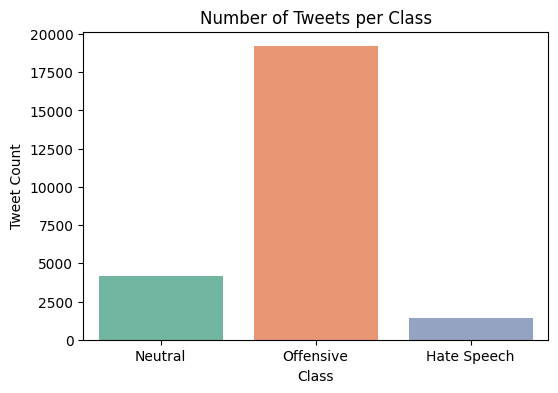

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette='Set2')
plt.title("Number of Tweets per Class")
plt.xlabel("Class")
plt.ylabel("Tweet Count")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


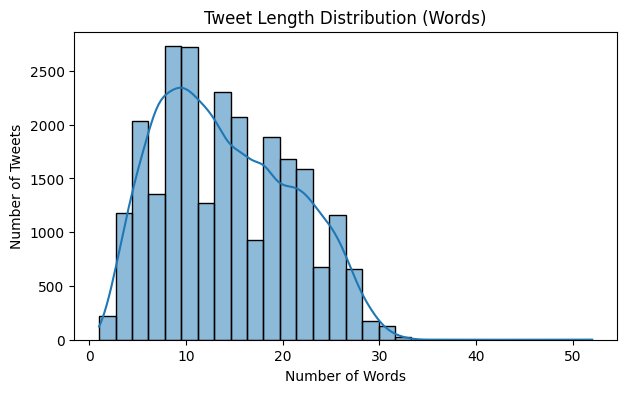

In [6]:
# Calculate tweet lengths (in words)
df['tweet_length'] = df['tweet'].astype(str).apply(lambda x: len(x.split()))

plt.figure(figsize=(7,4))
sns.histplot(df['tweet_length'], bins=30, kde=True)
plt.title("Tweet Length Distribution (Words)")
plt.xlabel("Number of Words")
plt.ylabel("Number of Tweets")
plt.show()

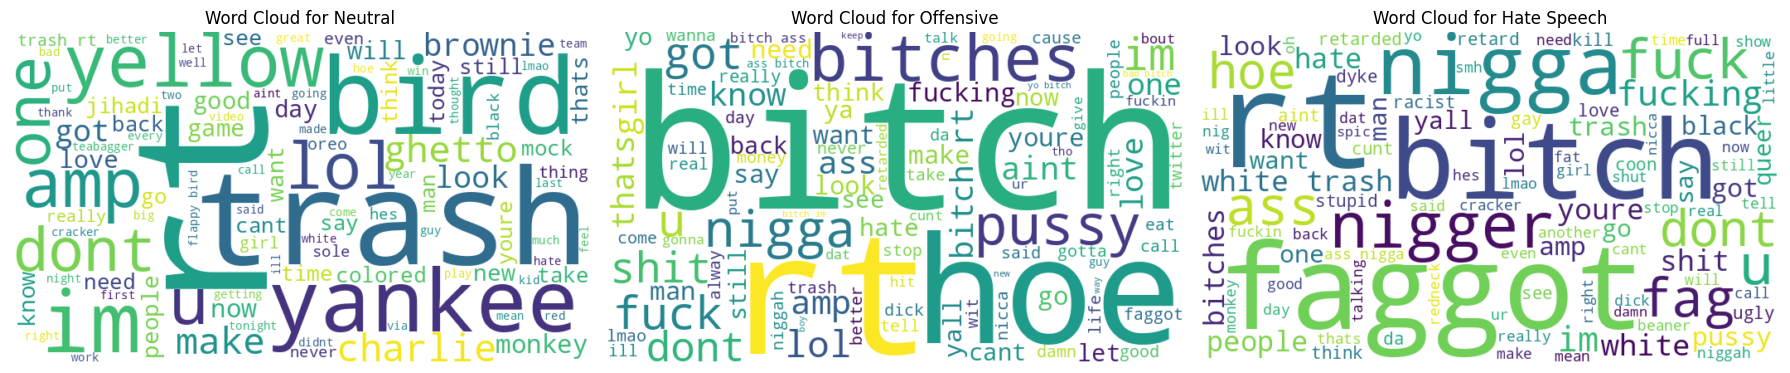

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

def clean_text(text):
    text = re.sub(r"http\S+|www.\S+", "", str(text).lower())   # remove links
    text = re.sub(r"@\w+", "", text)  # remove mentions
    text = re.sub(r"[^a-z\s]", "", text)  # remove non-letters
    return text

labels = df['label'].unique()
fig, axes = plt.subplots(1, len(labels), figsize=(18, 5))  # Single row, one column per label

for idx, label in enumerate(labels):
    text = " ".join(df[df['label'] == label]['tweet'].astype(str).apply(clean_text))
    wc = WordCloud(width=700, height=400, background_color="white", max_words=100).generate(text)
    axes[idx].imshow(wc, interpolation="bilinear")
    axes[idx].axis("off")
    axes[idx].set_title(f"Word Cloud for {label}")

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


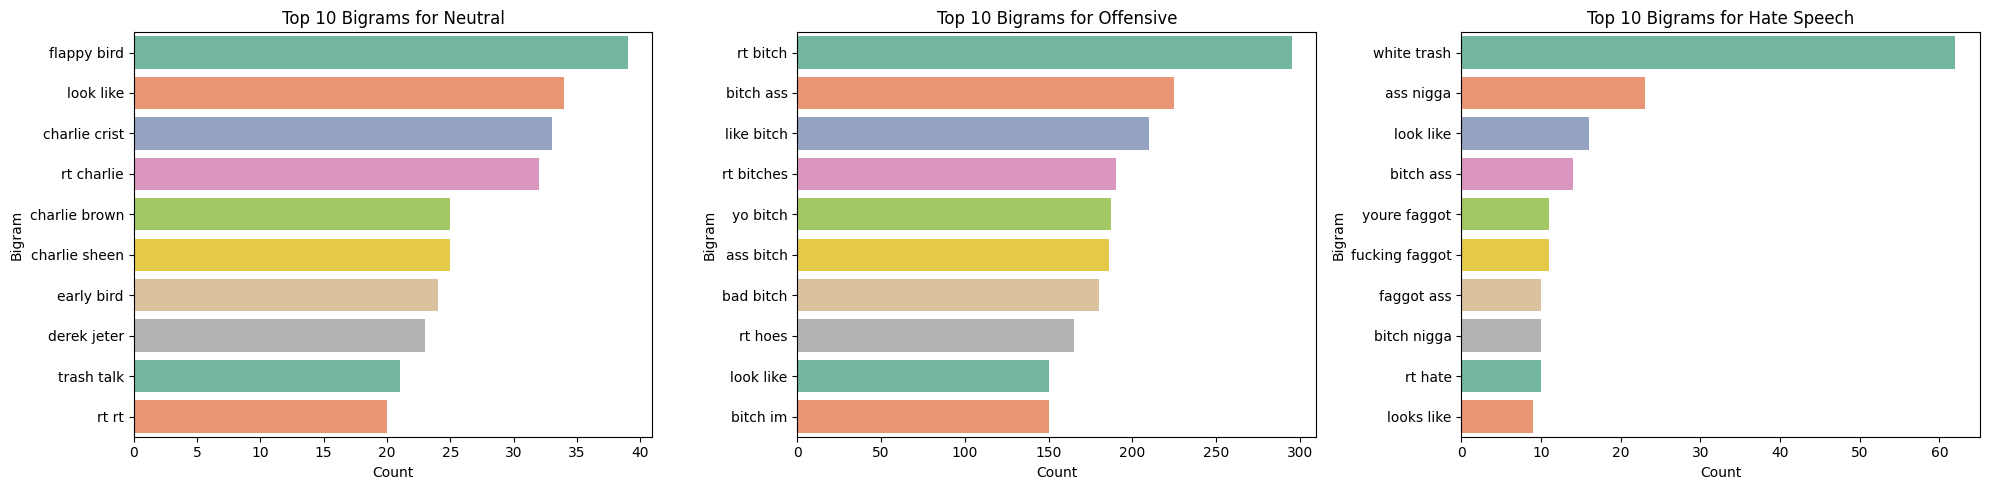

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

labels = df['label'].unique()
fig, axes = plt.subplots(1, len(labels), figsize=(20, 5))  # Adjust figsize as needed

for idx, label in enumerate(labels):
    texts = df[df['label'] == label]['tweet']
    top_bigrams = get_top_ngrams(texts, ngram_range=(2,2), n=10)
    bigrams, counts = zip(*top_bigrams)
    sns.barplot(x=list(counts), y=list(bigrams), palette="Set2", ax=axes[idx])
    axes[idx].set_title(f"Top 10 Bigrams for {label}")
    axes[idx].set_xlabel("Count")
    axes[idx].set_ylabel("Bigram")

plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


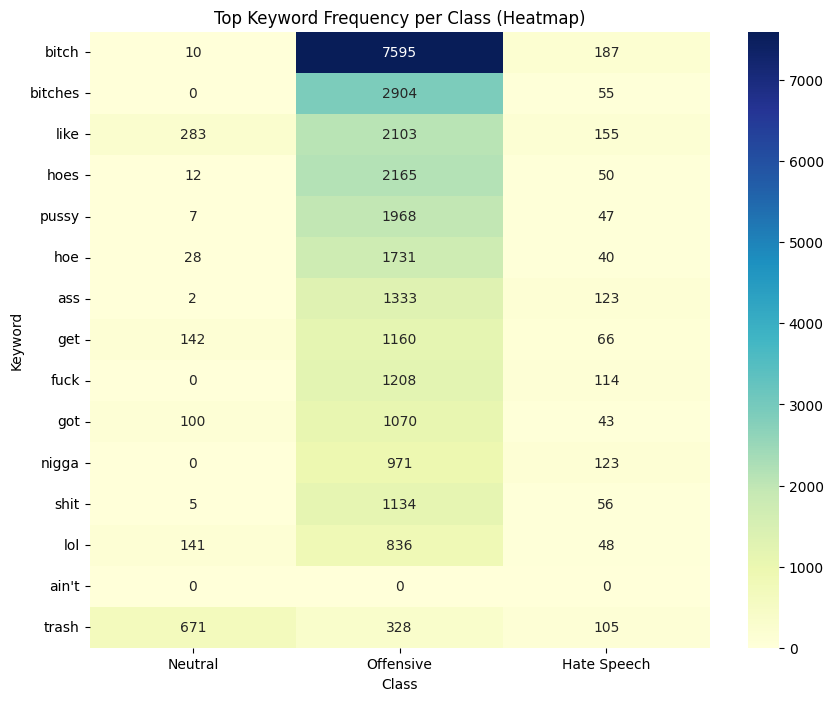

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# -- Get top N keywords --
def clean_text(text):
    text = re.sub(r"http\S+|www.\S+", "", str(text).lower())   # remove links
    text = re.sub(r"@\w+", "", text)  # remove mentions
    text = re.sub(r"[^a-z\s]", "", text)  # remove non-letters
    return text

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def get_keywords(texts, n=15):
    words = " ".join(texts.astype(str)).lower().split()
    words = [w for w in words if w not in stop_words and len(w) > 2]
    return [w for w, c in Counter(words).most_common(n)]

# Get top 15 words in the whole dataset
top_keywords = get_keywords(df['tweet'], n=15)

# Create the matrix: rows=keywords, columns=labels
matrix = []
for word in top_keywords:
    row = []
    for label in df['label'].unique():
        texts = df[df['label'] == label]['tweet'].astype(str).apply(clean_text)
        count = sum(word in t.split() for t in texts)
        row.append(count)
    matrix.append(row)

heatmap_df = pd.DataFrame(matrix, index=top_keywords, columns=df['label'].unique())

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_df, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Top Keyword Frequency per Class (Heatmap)")
plt.xlabel("Class")
plt.ylabel("Keyword")
plt.show()
